<a href="https://colab.research.google.com/github/Sid-Deshpande/Exploratory-Data-Analysis/blob/main/Capstone_Project_Module_6_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**   - Health Insurance Cross Sell Prdecition



##### **Project Type**    - EDA/Classification
##### **Contribution**    - Individual

# **Project Summary -** Predicting Customer Interest in Vehicle Insurance

**Objective**:

The primary goal of this project is to build a machine learning (ML) model to predict whether policyholders who currently hold health insurance policies will be interested in purchasing vehicle insurance from the same company. Accurately predicting customer interest in vehicle insurance enables the insurance company to strategically target customers with high conversion potential, optimizing marketing efforts, communication strategies, and overall revenue generation.


**Business Context**:

Insurance is fundamentally a risk-sharing agreement where customers pay a periodic premium to protect themselves from potential financial loss due to health, vehicle damage, or other events. In the case of health insurance, customers pay a regular premium in exchange for coverage on medical expenses such as hospitalizations, surgeries, and medication. Similarly, vehicle insurance covers the cost of damage repair, liability, and other expenses in case of accidents. A company that provides both types of insurance has a unique opportunity to cross-sell vehicle insurance to its existing health insurance policyholders.

In this scenario, the company seeks to determine which of its health insurance customers would be most likely to buy vehicle insurance. Identifying these customers can help the company direct marketing and sales efforts more efficiently, improving customer acquisition and retention rates.


Approach to Model Building
To achieve the prediction objective, the following steps will be taken:

**Data Preprocessing**:

This involves cleaning the dataset, handling missing values, encoding categorical features, and scaling numerical features. Ensuring that the data is in a format suitable for model training is crucial.

**Exploratory Data Analysis (EDA)**:

EDA will help identify patterns and relationships in the data, providing insights into customer behavior and the factors that influence interest in vehicle insurance.

**Model Selection**:

Several machine learning algorithms will be evaluated, including:

Logistic Regression
Decision Trees
Random Forests
Gradient Boosting (e.g., XGBoost or LightGBM)
Support Vector Machines (SVM)
These algorithms will be tested to determine which offers the best balance of accuracy, interpretability, and computational efficiency.

**Model Evaluation**:

The model will be evaluated using metrics such as accuracy, precision, recall, F1-score, and the area under the ROC curve (AUC). Cross-validation will be employed to assess the model's performance on different subsets of the data.

**Optimization**:

Hyperparameter tuning and regularization techniques will be applied to optimize the model’s performance.

**Expected Outcome**:

The outcome of this project is a predictive model that can help the insurance company identify the health insurance customers who are most likely to purchase vehicle insurance. This will enable the company to target its marketing efforts more effectively, improving customer conversion rates and maximizing revenue.

# **GitHub Link -**

https://github.com/Sid-Deshpande

# **Problem Statement**


The insurance company, which currently provides health insurance to a significant number of customers, is seeking to expand its offerings by cross-selling vehicle insurance. However, not all customers with health insurance will be interested in purchasing vehicle insurance, and blindly targeting the entire customer base could lead to inefficient marketing efforts and unnecessary costs.

To optimize their outreach, the company requires a predictive model that can accurately identify which of their existing health insurance policyholders are most likely to be interested in purchasing vehicle insurance. The model should leverage available customer data, including demographics, vehicle information, and current policy details, to predict interest in vehicle insurance. This prediction will allow the company to focus its resources on high-probability customers, improve conversion rates, and maximize business growth.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

### Dataset First View

In [ ]:
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


### Dataset Rows & Columns count

In [ ]:
data.shape

(381109, 12)

### Dataset Information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [ ]:
data.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
data.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


<Axes: >

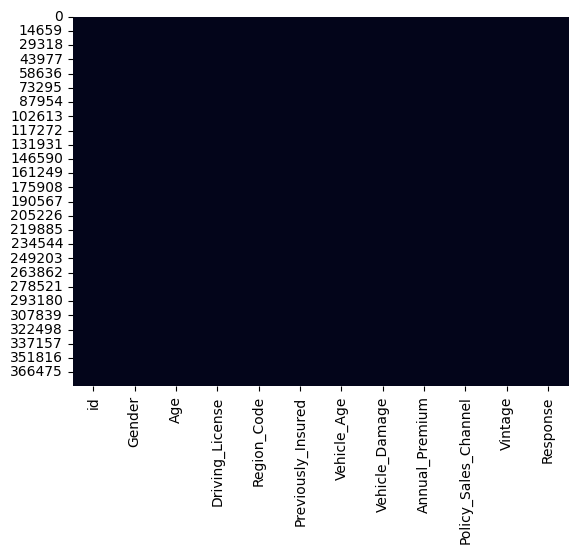

In [ ]:
# Visualizing the missing values

sns.heatmap(data.isnull(), cbar=False)

### What did you know about your dataset?

1. there arer 381109 rows and 12 columns present in dataset

2. We don't have any null or duplicated values in our dataset

3. Our dependent feature i.e Response is a categorical column

4. There are several numeric and categorical columns in datasets

## ***2. Understanding Your Variables***

In [ ]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description

1. **id**: Unique identifier for each customer in the dataset.
   
2. **Gender**: The gender of the customer, which can be either Male or Female.
   
3. **Age**: The age of the customer (numeric value).

4. **Driving License**: Indicator of whether the customer holds a driving license (binary: Yes/No).
   
5. **Region_Code**: A unique code representing the geographic region of the customer.
   
6. **Previously_insured**: A binary variable indicating whether the customer already has vehicle insurance (Yes/No).
   
7. **Vehicle_age**: The age of the customer's vehicle (numeric or categorized into ranges such as 1-2 years, >2 years, etc.).

8. **Vehicle_damage**: Indicates whether the customer's vehicle has sustained damage in the past (binary: Yes/No).

9. **Annual_premium**: The annual premium amount that the customer pays for their current health insurance policy (numeric value).
   
10. **PolicySalesChannel**: An anonymized code representing the sales channel through which the customer was contacted or sold the policy (e.g., online, via phone, agents, etc.).

11. **Vintage**: The number of days the customer has been associated with the insurance company.

12. **Response**: The target variable indicating whether the customer is interested in purchasing vehicle insurance (binary: Yes/No).

### Check Unique Values for each variable.

In [ ]:
data.nunique()

,0
id,381109
Gender,2
Age,66
Driving_License,2
Region_Code,53
Previously_Insured,2
Vehicle_Age,3
Vehicle_Damage,2
Annual_Premium,48838
Policy_Sales_Channel,155


## 3. ***Data Wrangling***

### Data Wrangling Code

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Axes: xlabel='Response', ylabel='count'>

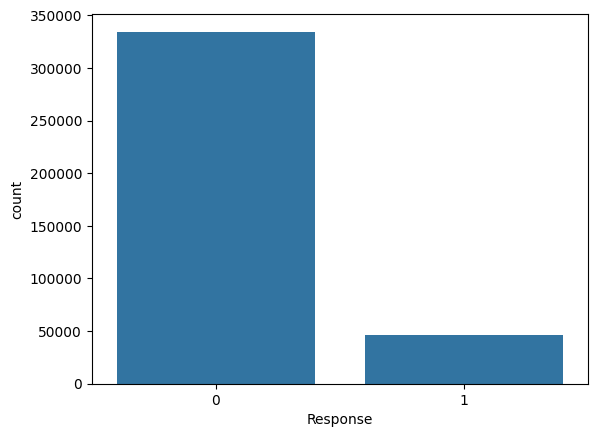

In [ ]:
# countplot of response

sns.countplot(x=data['Response'])

##### 1. Why did you pick the specific chart?

for comparision of values of response column i.e our target variable

##### 2. What is/are the insight(s) found from the chart?

To get the information that how many are positive responses present in the dataset

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is a negative growth because we want maximum response from policy holders for the insurance

#### Chart - 2

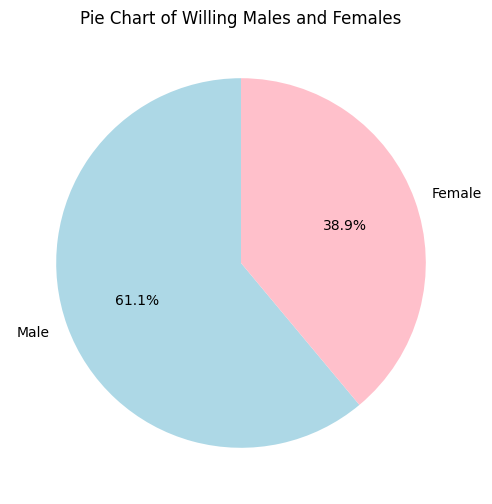

In [ ]:
# Plot of willing Males and Females

# Filter willing customers (Response == 1)
willing_customers = data[data['Response'] == 1]

# Count of willing males and females
gender_counts = willing_customers['Gender'].value_counts()

# Pie Chart
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])
plt.title('Pie Chart of Willing Males and Females')
plt.show()

##### 1. Why did you pick the specific chart?

This chart teels you percentage splits between men and women who are willing to take insurance

##### 2. What is/are the insight(s) found from the chart?

mens have large percentage of taking insurance policy than women

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Women customers should know about the policy more and more... May be to gain interest some offers can make a positive impact

#### Chart - 3

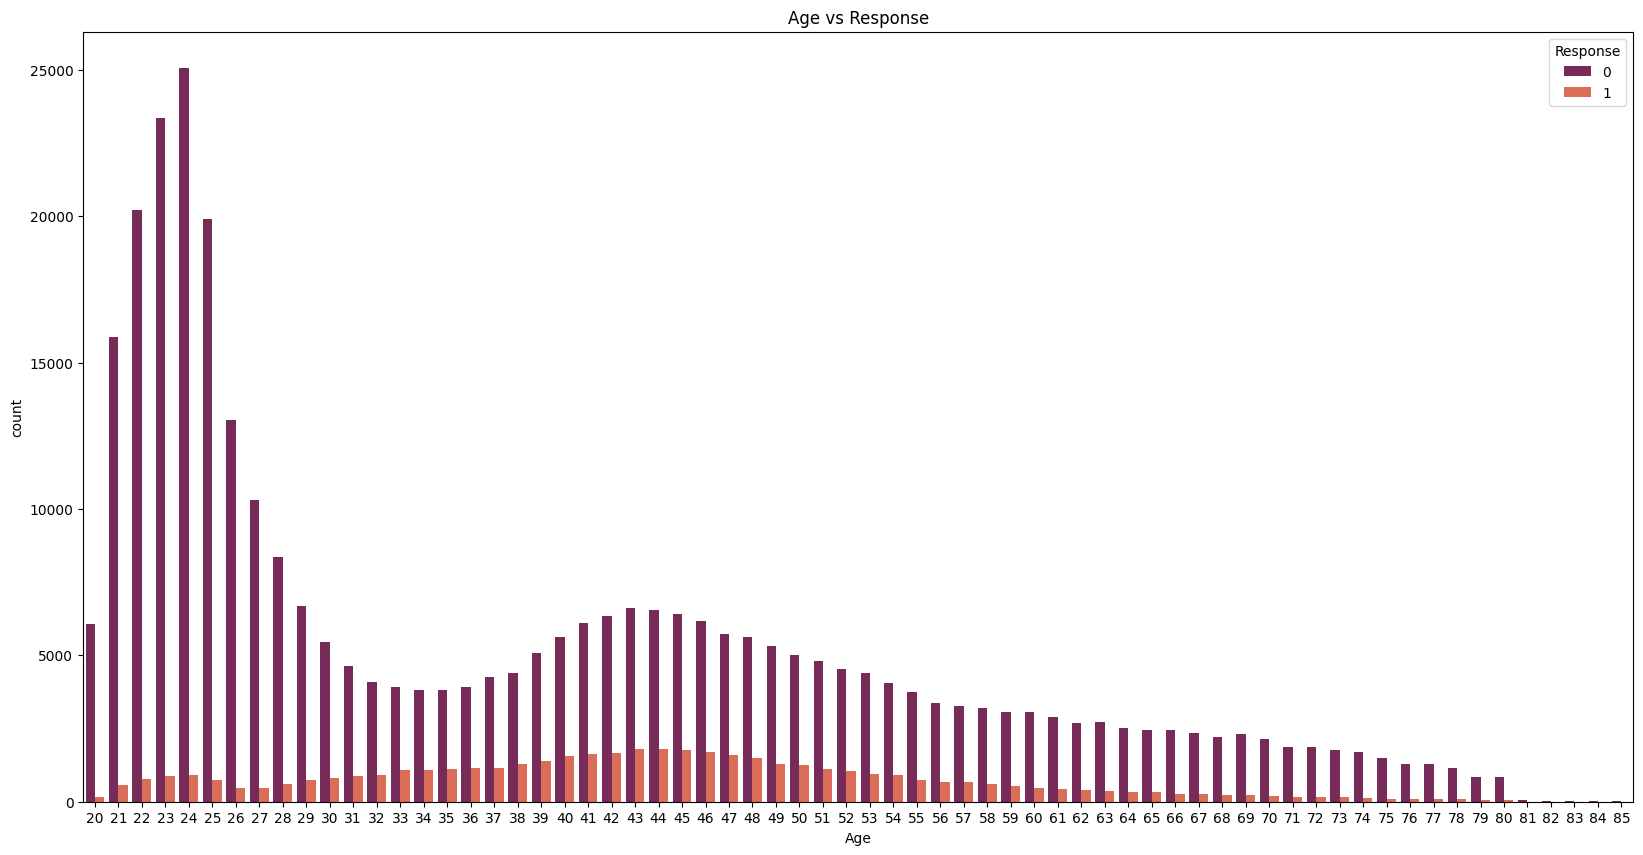

In [ ]:
# Plot of age vs resonse

plt.figure(figsize=(20,10))
sns.countplot(x ='Age', hue ='Response', data = data , palette = "rocket")
plt.title('Age vs Response')
plt.show()

##### 1. Why did you pick the specific chart?

plot clearly stating the positive and negative resonse of different age groups

##### 2. What is/are the insight(s) found from the chart?

people above the age of 30 and and below the age of 60 were more keen to take the insurance

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Reasons could be immaturity, less income, and inexperience in managing their money

#### Chart - 4

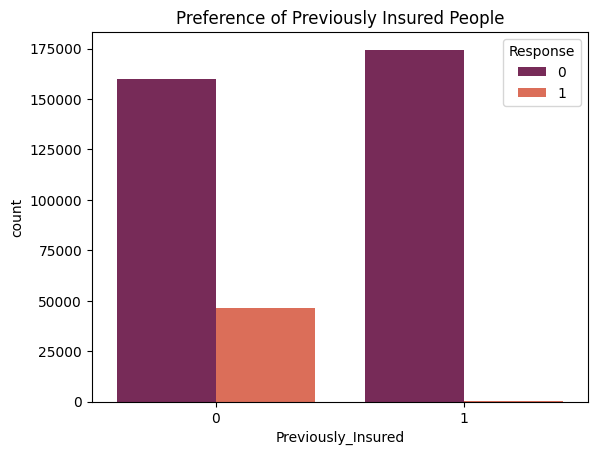

In [ ]:
# preference of previously insured people

sns.countplot(x = data['Previously_Insured'], hue = data['Response'], palette = 'rocket')
plt.title('Preference of Previously Insured People')
plt.show()

##### 1. Why did you pick the specific chart?

because we got the comaprision wheather previously insured people have taken new insurance or not

##### 2. What is/are the insight(s) found from the chart?

Customers who are not previously insured are likely to be intersted

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

People should aware about an insurance as they meet an accident anytime

#### Chart - 5

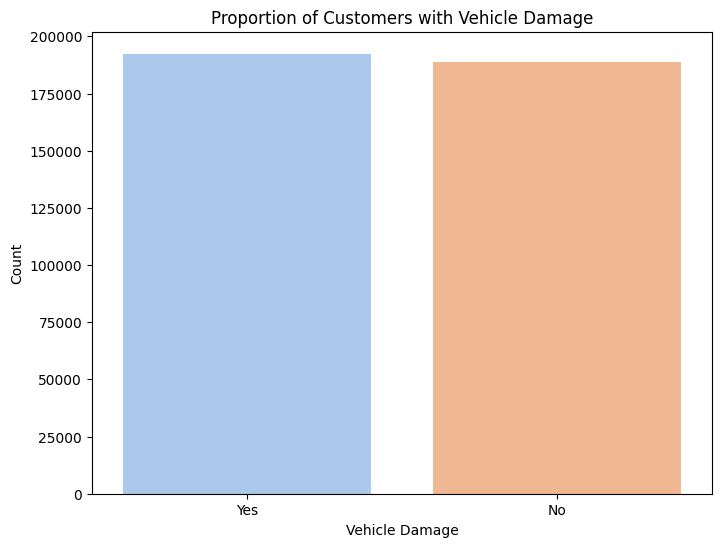

In [ ]:
# Proportion of customer with vehicle damage

plt.figure(figsize=(8, 6))
sns.countplot(x='Vehicle_Damage', data=data, palette='pastel')
plt.title('Proportion of Customers with Vehicle Damage')
plt.xlabel('Vehicle Damage')
plt.ylabel('Count')
plt.show()

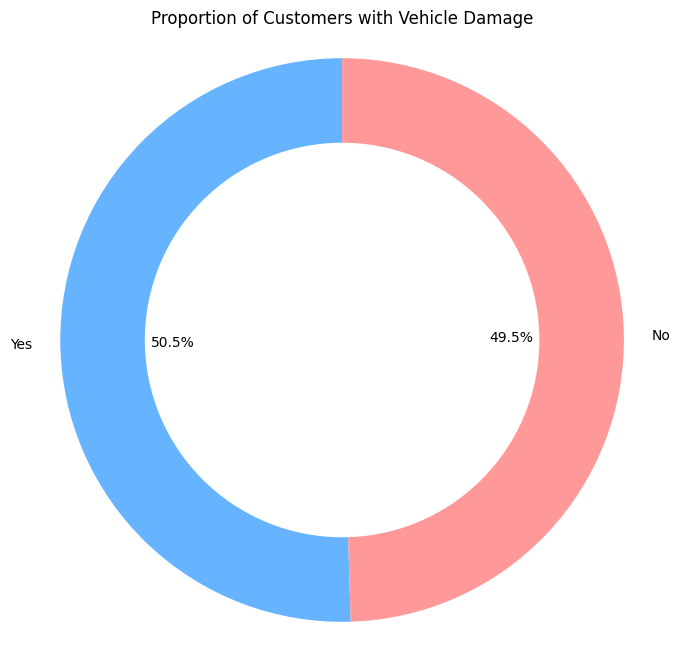

In [ ]:
plt.figure(figsize=(8, 8))
damage_counts = data['Vehicle_Damage'].value_counts()
plt.pie(damage_counts, labels=damage_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
# Adding a white circle to create a donut effect
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Proportion of Customers with Vehicle Damage')
plt.axis('equal')
plt.show()


##### 1. Why did you pick the specific chart?

It provides a clear visual comparison between customers with and without vehicle damag

##### 2. What is/are the insight(s) found from the chart?

Customers with previous vehicle damage may show a higher interest in vehicle insurance.
Those without vehicle damage might be less inclined to purchase insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The business can target customers with past damage for insurance upsell opportunities.

Tailored marketing strategies can increase conversion rates for this segment.

#### Chart - 6

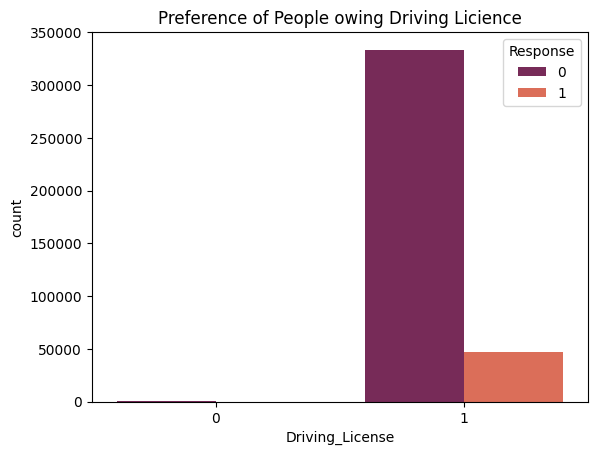

In [ ]:
# preference of people owing driving liciense

sns.countplot(x = data['Driving_License'], hue = data['Response'], palette = 'rocket')
plt.title('Preference of People owing Driving Licience')
plt.show()

##### 1. Why did you pick the specific chart?

bar plot showing the response of preference of driving license


##### 2. What is/are the insight(s) found from the chart?

Customers who are interested are likely to have driving license

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

People should also have insurarance who have not driving license

#### Chart - 7

Text(0.5, 0, 'Vehicle Age')

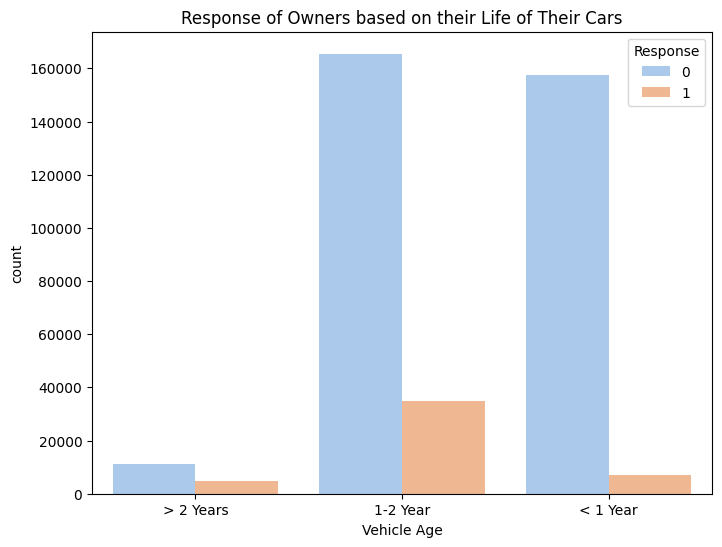

In [ ]:
# Response of owners based on their life of their cars

plt.figure(figsize=(8, 6))
sns.countplot(x='Vehicle_Age', data=data, hue='Response', palette='pastel')
plt.title('Response of Owners based on their Life of Their Cars')
plt.xlabel('Vehicle Age')

##### 1. Why did you pick the specific chart?

 bar plot shows the Response of owners based on their cars

##### 2. What is/are the insight(s) found from the chart?

customers with vehicle age 1-2 are more likely to take the insurance in comarision with others


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The importance of having an insurance when buying new vehicles are told to the customers

#### Chart - 8

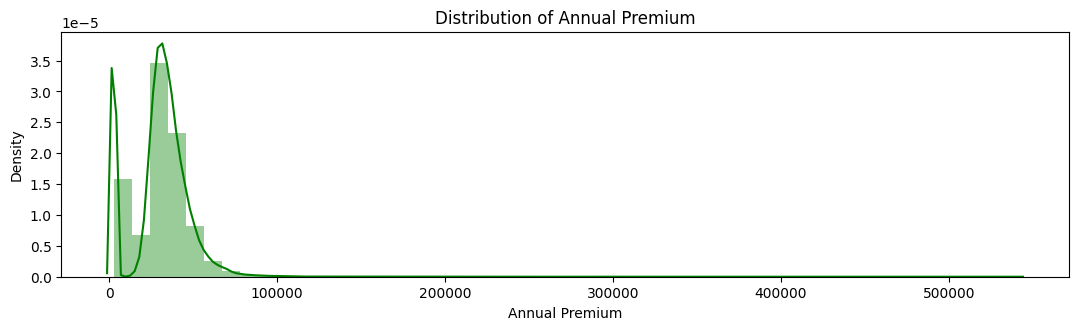

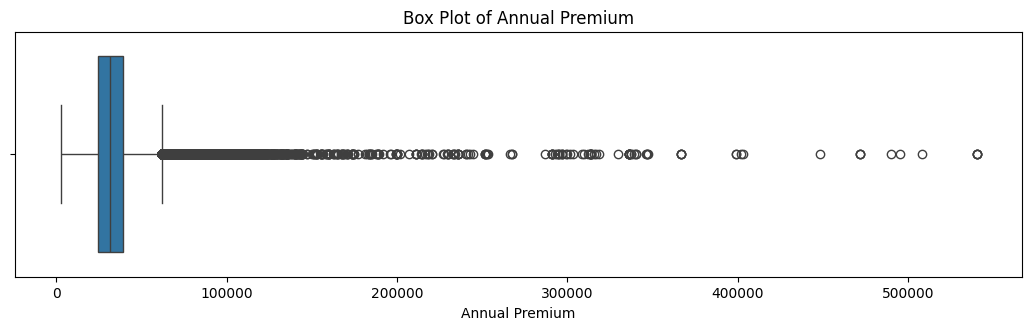

In [ ]:
# Distribution of annual premium

plt.figure(figsize=(13,7))
plt.subplot(2,1,1)
sns.distplot(data['Annual_Premium'], color='green')
plt.title('Distribution of Annual Premium')
plt.xlabel('Annual Premium')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(13,7))
plt.subplot(2,1,2)
sns.boxplot(x = data['Annual_Premium'])
plt.title('Box Plot of Annual Premium')
plt.xlabel('Annual Premium')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# # corelation heatmap

# plt.figure(figsize=(15, 8))
# sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

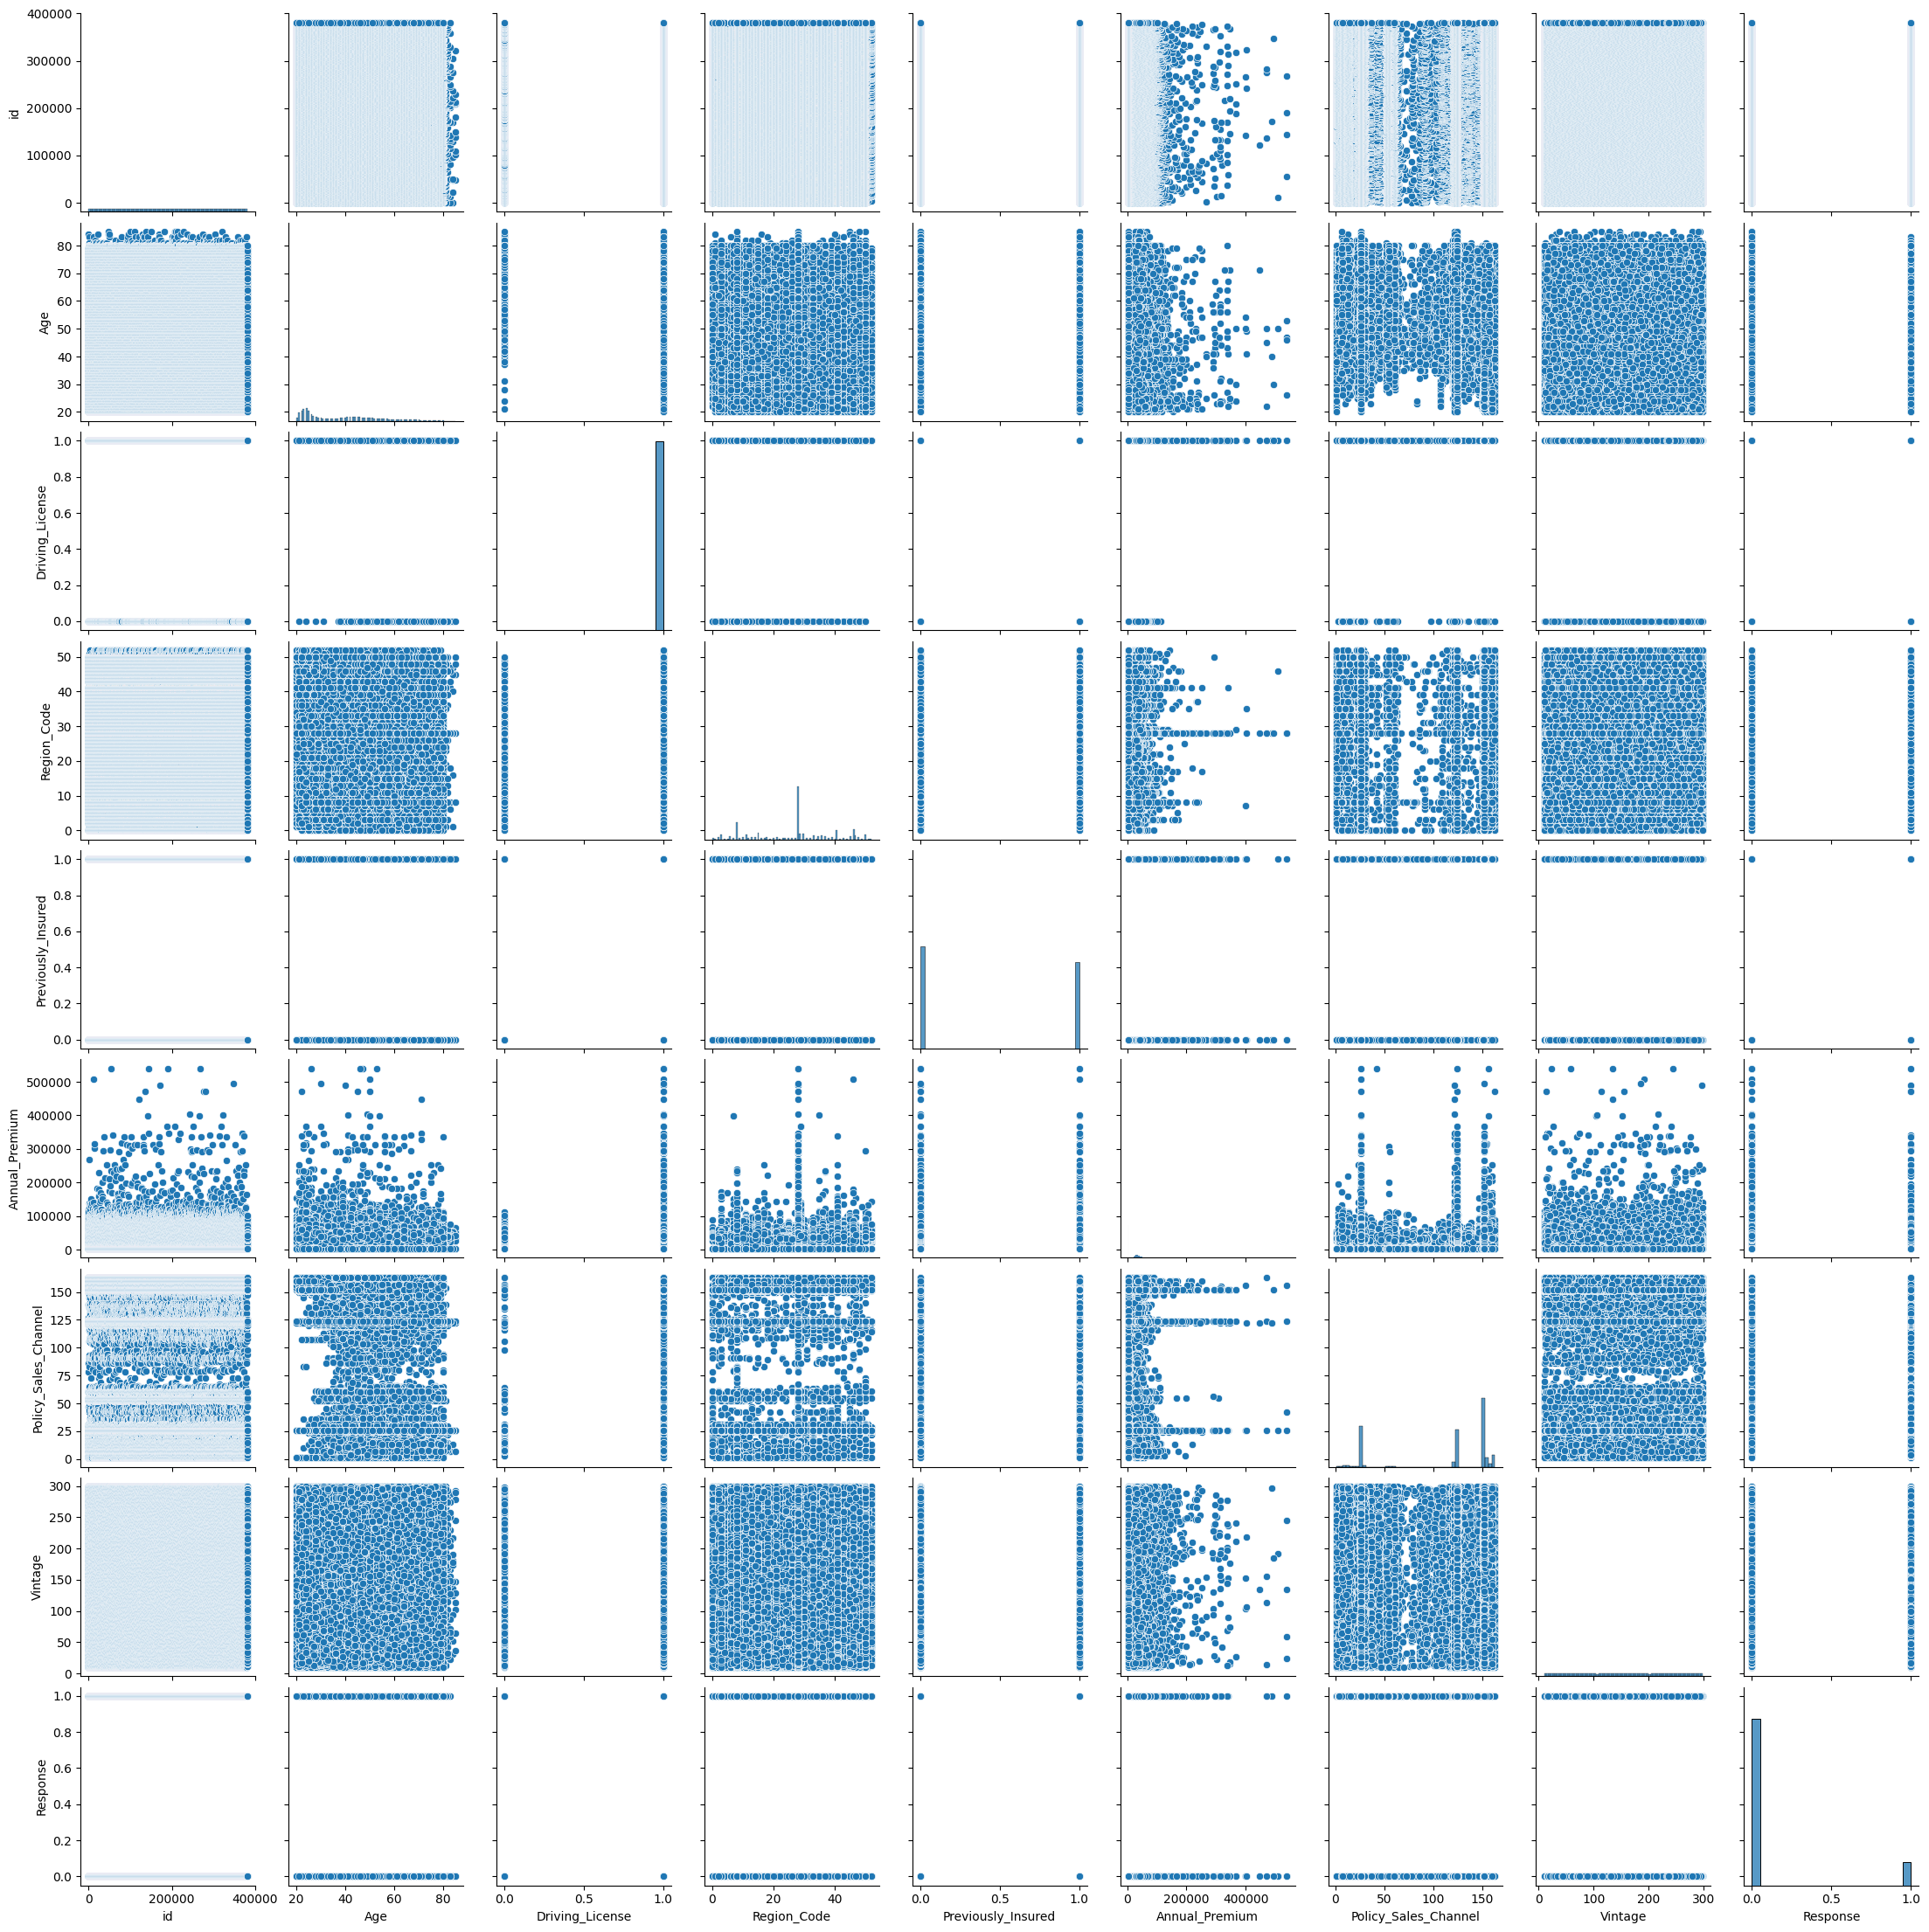

In [ ]:
# # pair plot

sns.pairplot(data)
plt.show()

##### 1. Why did you pick the specific chart?

Specifically it will give aspects of distribution of graphs

#### Chart - 11

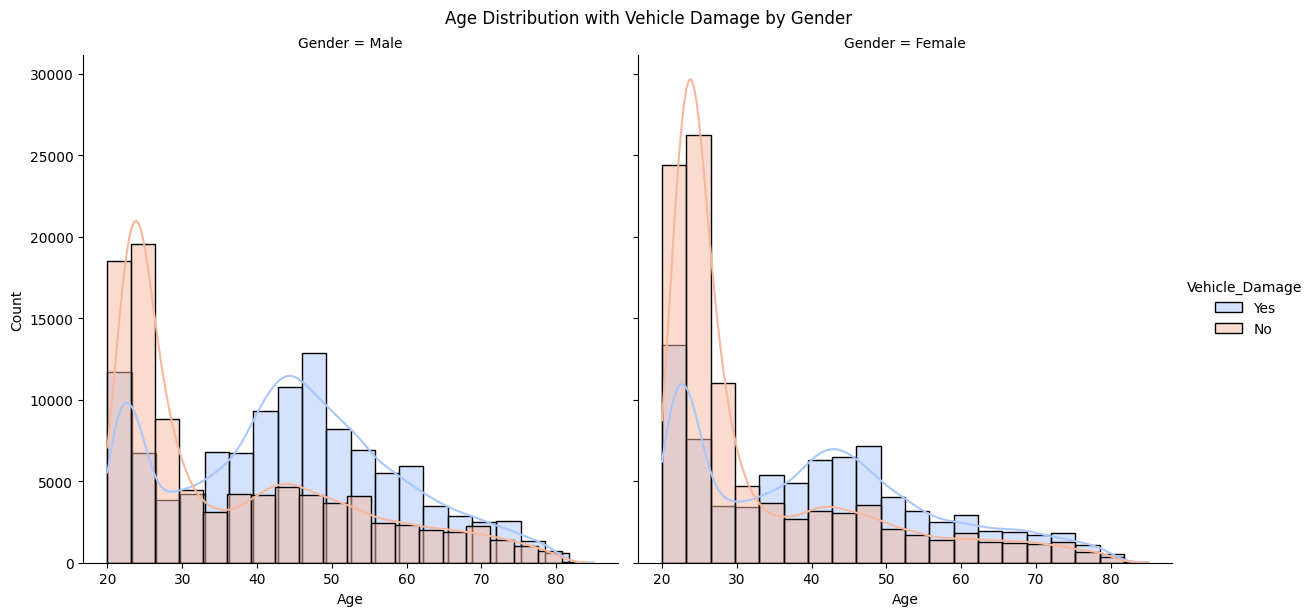

In [ ]:
# Vehicle damage across gender
g = sns.FacetGrid(data, col="Gender", hue="Vehicle_Damage", height=6, palette="coolwarm", aspect=1)
g.map(sns.histplot, 'Age', kde=True, bins=20).add_legend()
g.fig.suptitle('Age Distribution with Vehicle Damage by Gender', y=1.02)
plt.show()

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

We can test whether there is a significant association between Vehicle_damage and Response (interest in insurance).

**Null Hypothesis (H0)**:

There is no association between Vehicle_damage and Response.

**Alternative Hypothesis (H1)**:

There is an association between Vehicle_damage and Response.

#### 2. Perform an appropriate statistical test.

In [ ]:
# 1 Chi-Square testing

import scipy.stats as stats

# Create a contingency table
contingency_table = pd.crosstab(data['Vehicle_Damage'], data['Response'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Output the results
print(f"Chi2: {chi2}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis (H0). There is a significant association between Vehicle Damage and Response.")
else:
    print("Fail to reject the null hypothesis (H0). No significant association between Vehicle Damage and Response.")


Chi2: 47864.76180117493
P-value: 0.0
Reject the null hypothesis (H0). There is a significant association between Vehicle Damage and Response.


##### Which statistical test have you done to obtain P-Value?

Chi-Square test

##### Why did you choose the specific statistical test?

I chose this test because it measures the association between two categorical variables (Vehicle_damage and Response), which is ideal for determining if there's a relationship between them.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

We can test if the mean annual premium differs significantly between those interested (Response = Yes) and not interested (Response = No) in vehicle insurance.

**Null Hypothesis (H0)**:

The mean annual premium is the same for both groups (Response = Yes and No).

**Alternative Hypothesis (H1)**:

The mean annual premium is different for the two groups.

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy.stats import ttest_ind

# Split the data into two groups
group_yes = data[data['Response'] == 1]['Annual_Premium']
group_no = data[data['Response'] == 0]['Annual_Premium']

# Perform independent T-test
t_stat, p_value = ttest_ind(group_yes, group_no)

# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis (H0). The mean annual premium is significantly different between the two groups.")
else:
    print("Fail to reject the null hypothesis (H0). No significant difference in the mean annual premium between the two groups.")


T-statistic: 13.939784337147294
P-value: 3.7223151414267487e-44
Reject the null hypothesis (H0). The mean annual premium is significantly different between the two groups.


##### Which statistical test have you done to obtain P-Value?

Independent T-Test.

##### Why did you choose the specific statistical test?

This test is appropriate when comparing the means of a continuous variable (e.g., Annual_premium) between two groups (those interested vs. not interested in insurance).

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

You can use ANOVA to compare the means of a continuous variable across more than two categories, like Vehicle_age.

**Null Hypothesis (H0)**:

The mean vintage is the same across different vehicle age categories.

#### 2. Perform an appropriate statistical test.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Create the model
model = ols('Vintage ~ C(Age)', data=data).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

if anova_table['PR(>F)'][0] < 0.05:
    print("Reject the null hypothesis (H0). The mean vintage is significantly different across vehicle age groups.")
else:
    print("Fail to reject the null hypothesis (H0). No significant difference in mean vintage across vehicle age groups.")


                sum_sq        df         F    PR(>F)
C(Age)    3.900093e+05      65.0  0.857034  0.787617
Residual  2.667704e+09  381043.0       NaN       NaN
Fail to reject the null hypothesis (H0). No significant difference in mean vintage across vehicle age groups.


##### Which statistical test have you done to obtain P-Value?

ANOVA test

##### Why did you choose the specific statistical test?

I selected ANOVA because it compares the means of a continuous variable (Vintage) across multiple categories (Vehicle_age), making it suitable for testing differences across more than two groups.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# There is no missing values present in the dataset

### 2. Handling Outliers

In [ ]:
# Detecting Outliers Using the Interquartile Range (IQR) Method
# The IQR method helps identify outliers by detecting values that fall below Q1 − 1.5 * IQR or above Q3 + 1.5 * IQR.

# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers in the 'Annual_premium' column
outliers = detect_outliers_iqr(data, 'Annual_Premium')
print(f"Outliers in Annual Premium:\n{outliers}")


Outliers in Annual Premium:
            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
25          26  Female   21                1         28.0                   1   
37          38  Female   25                1         28.0                   1   
67          68    Male   60                1         28.0                   0   
139        140    Male   21                1         29.0                   1   
149        150  Female   22                1         11.0                   1   
...        ...     ...  ...              ...          ...                 ...   
380959  380960    Male   25                1          8.0                   1   
380998  380999  Female   33                1          8.0                   0   
381035  381036  Female   22                1         11.0                   1   
381047  381048  Female   52                1          8.0                   1   
381079  381080    Male   33                1         28.0                   0   


In [ ]:
 # Function to detect outliers in all numeric columns using IQR
def detect_outliers_in_columns(df, columns):
    outliers_dict = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        if not outliers.empty:
            outliers_dict[column] = len(outliers)
    return outliers_dict

# Select numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Detect outliers in numeric columns
outliers_summary = detect_outliers_in_columns(data, numeric_columns)

# Print summary of columns with outliers and their counts
print(f"Outliers detected in the following columns:\n{outliers_summary}")


Outliers detected in the following columns:
{'Driving_License': 812, 'Annual_Premium': 10320, 'Response': 46710}


In [ ]:
# handling the outliers

def cap_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Capping outliers in numeric columns
data_capped = cap_outliers(data.copy(), numeric_columns)
print(f"Data shape after capping outliers: {data_capped.shape}")


Data shape after capping outliers: (381109, 12)


In [ ]:
def apply_log_transformation(df, columns):
    for column in columns:
        df[column + '_log'] = np.log1p(df[column])  # log1p to avoid log(0) issues
    return df

# Applying log transformation to numeric columns
data_transformed = apply_log_transformation(data.copy(), numeric_columns)
print(f"Data with log-transformed columns:\n{data_transformed.head()}")


Data with log-transformed columns:
   id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  ...  \
0   > 2 Years            Yes         40454.0                  26.0  ...   
1    1-2 Year             No         33536.0                  26.0  ...   
2   > 2 Years            Yes         38294.0                  26.0  ...   
3    < 1 Year             No         28619.0                 152.0  ...   
4    < 1 Year             No         27496.0                 152.0  ...   

   Response    id_log   Age_log  Driving_License_log  Region_Code_log  \
0       

##### What all outlier treatment techniques have you used and why did you use those techniques?

Log Transformation and capping outliers are two best outliers detection as there is no such data losses in this removal of outliers

### 3. Categorical Encoding

In [ ]:
labelEncoder = LabelEncoder()
data['Gender'] = labelEncoder.fit_transform(data['Gender'])
data['Vehicle_Age'] = labelEncoder.fit_transform(data['Vehicle_Age'])
data['Vehicle_Damage'] = labelEncoder.fit_transform(data['Vehicle_Damage'])

In [ ]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [ ]:
data.shape

(381109, 12)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Label Encoding as it is more useful than OneHotEncoding

## 4. Feature Selection

In [ ]:
# Seperating the dependent variable and independent variable
X = data.drop(['Response'], axis=1) # Independent Variable
y = data['Response'] # Dependent Variable

[0.19276586 0.00598536 0.13946909 0.0004613  0.09422413 0.05486497
 0.01581425 0.07761021 0.1632831  0.06921145 0.18631029]


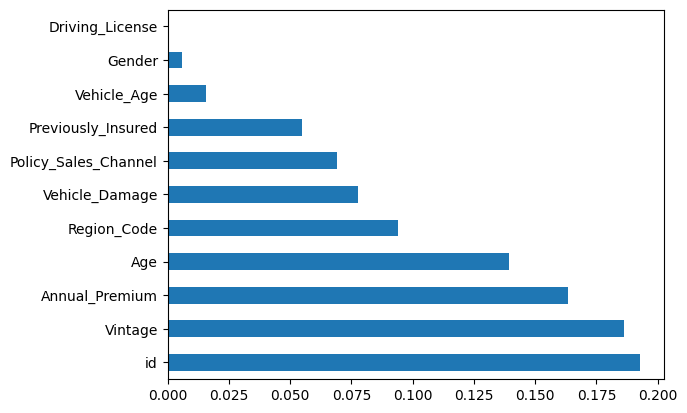

In [ ]:
model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_)

# Plot graph of feature importance for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

In [ ]:
X = X.drop(['Driving_License'],axis = 1) # dropping the driving license as it has least weightage

In [ ]:
X

,id,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,1,44,28.0,0,2,1,40454.0,26.0,217
1,2,1,76,3.0,0,0,0,33536.0,26.0,183
2,3,1,47,28.0,0,2,1,38294.0,26.0,27
3,4,1,21,11.0,1,1,0,28619.0,152.0,203
4,5,0,29,41.0,1,1,0,27496.0,152.0,39
...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,26.0,1,0,0,30170.0,26.0,88
381105,381106,1,30,37.0,1,1,0,40016.0,152.0,131
381106,381107,1,21,30.0,1,1,0,35118.0,160.0,161
381107,381108,0,68,14.0,0,2,1,44617.0,124.0,74


### 6. Data Scaling

In [ ]:
# Scaling your data

from sklearn.preprocessing import StandardScaler

# Select numeric columns for scaling
numeric_columns = ['Annual_Premium', 'Vintage', 'Age','Policy_Sales_Channel']  # Add more if needed

# Apply StandardScaler
scaler = StandardScaler()
data_scaled = data.copy()
data_scaled[numeric_columns] = scaler.fit_transform(data_scaled[numeric_columns])

print(f"Scaled Data:\n{data_scaled.head()}")

Scaled Data:
   id  Gender       Age  Driving_License  Region_Code  Previously_Insured  \
0   1       1  0.333777                1         28.0                   0   
1   2       1  2.396751                1          3.0                   0   
2   3       1  0.527181                1         28.0                   0   
3   4       1 -1.148985                1         11.0                   1   
4   5       0 -0.633242                1         41.0                   1   

   Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0            2               1        0.574539             -1.587234   
1            0               0        0.172636             -1.587234   
2            2               1        0.449053             -1.587234   
3            1               0       -0.113018              0.737321   
4            1               0       -0.178259              0.737321   

    Vintage  Response  
0  0.748795         1  
1  0.342443         0  
2 -1.521998        

##### Which method have you used to scale you data and why?

Standard - Z Score Normalization

because It is best suitable for Logistic Regression and SVM

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

In our case there is no need to reduce the dimensions as age,annual_premium and vintage are not that much highly corelated with each other, also it complexes the model.

Response
0    334399
1     46710
Name: count, dtype: int64


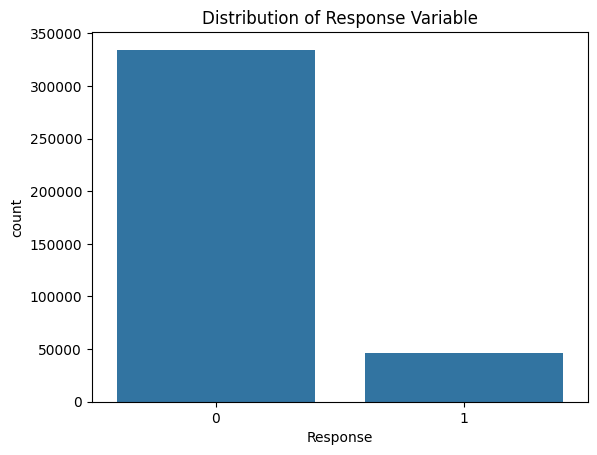

In [ ]:
# First check data is imbalance or not

# Check the distribution of the target variable
response_counts = data['Response'].value_counts()
print(response_counts)

sns.countplot(x='Response', data=data)
plt.title('Distribution of Response Variable')
plt.show()


### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes Dataset is imbalanced

Original dataset shape: (381109,)
Resampled dataset shape: (668798,)


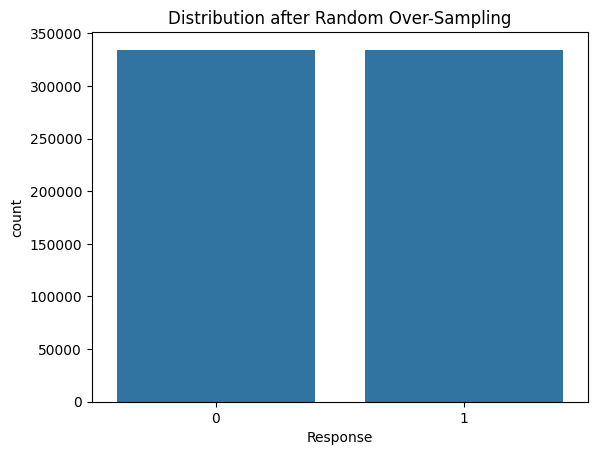

In [ ]:
# Handling Imbalanced Dataset

# Define the feature matrix X and target variable y
X = data.drop('Response', axis=1)
y = data['Response']

# Apply random over-sampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Check the new distribution
print(f"Original dataset shape: {y.shape}")
print(f"Resampled dataset shape: {y_resampled.shape}")

# Plot the resampled distribution
sns.countplot(x=y_resampled)
plt.title('Distribution after Random Over-Sampling')
plt.show()


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Balances the classes:

By duplicating the minority class instances, it increases the representation of that class in the training set.
Improves model performance: For classification algorithms, a balanced dataset often leads to more robust models.

### 8. Data Splitting

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.30,random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (468158, 11)
X_test shape: (200640, 11)
y_train shape: (468158,)
y_test shape: (200640,)


In [ ]:
# Feature selection
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

##### What data splitting ratio have you used and why?

we split the data into 7:3 ratio because we want our model to more and more learn

## ***7. ML Model Implementation***

### ML Model - 1: Logistic Regression

In [ ]:
reg  = LogisticRegression()
reg = reg.fit(X_train,y_train)
pred = reg.predict(X_test)

lr_probability = reg.predict_proba(X_test)[:, 1]


acc_lr = accuracy_score(y_test,pred)
f1_lr = f1_score(y_test,pred)
recall_lr = recall_score(y_test,pred)
precision_lr = precision_score(y_test,pred)
AUC_lr = roc_auc_score(pred,y_test)

print(f"Accuracy Score: {acc_lr}")
print(f"F1 Score: {f1_lr}")
print(f"Recall Score: {recall_lr}")
print(f"Precision Score: {precision_lr}")
print(f"AUC Score: {AUC_lr}")

Accuracy Score: 0.7863536682615629
F1 Score: 0.8207268621136715
Recall Score: 0.9762994507681286
Precision Score: 0.7079202920508492
AUC Score: 0.8347609971715703


In [ ]:
# print  the classification report
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.60      0.96      0.74     62034
           1       0.98      0.71      0.82    138606

    accuracy                           0.79    200640
   macro avg       0.79      0.83      0.78    200640
weighted avg       0.86      0.79      0.79    200640



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

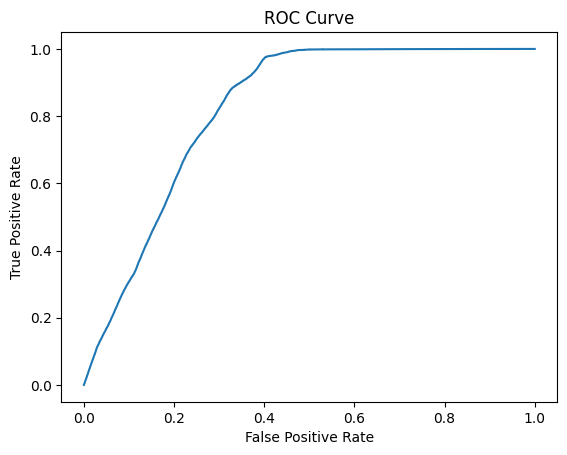

In [ ]:
# ROC CURVE(Graph between prescision and recall)

from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test,lr_probability)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

[[59652 40484]
 [ 2382 98122]]


Text(50.722222222222214, 0.5, 'Truth')

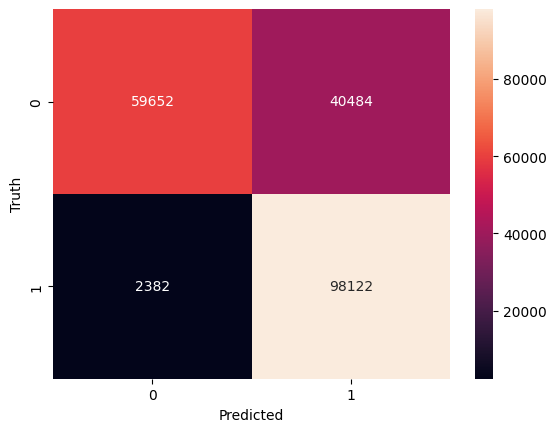

In [ ]:
# Confusion Metrics

cm = confusion_matrix(y_test,pred)
print(cm)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # L1 or L2 regularization
    'solver': ['liblinear', 'saga']  # Solvers that support L1 and L2 regularization
}

# Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Perform GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best parameters:  {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best accuracy:  0.7834534522583025


##### Which hyperparameter optimization technique have you used and why?

I have used Grid Search CV because it

Increased accuracy:

Hyperparameter tuning may help you surpass 78% accuracy by optimizing the regularization strength or solver.

Better model generalization:

A properly tuned Logistic Regression model is more likely to generalize well to unseen data.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No I have not seen any improvement in the accuracy

### ML Model - 2: Random Forest Classifier

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
randomforest = RandomForestClassifier()
randomforest = randomforest.fit(X_train,y_train)
y_pred = randomforest.predict(X_test)

RF_probability = randomforest.predict_proba(X_test)[:, 1]

acc_rf = accuracy_score(y_test,y_pred)
f1_rf = f1_score(y_test,y_pred)
recall_rf = recall_score(y_test,y_pred)
precision_rf = precision_score(y_test,y_pred)
AUC_rf = roc_auc_score(y_pred,y_test)

print(f"Accuracy Score: {acc_rf}")
print(f"F1 Score: {f1_rf}")
print(f"Recall Score: {recall_rf}")
print(f"Precision Score: {precision_rf}")
print(f"AUC Score: {AUC_rf}")

Accuracy Score: 0.9470693779904307
F1 Score: 0.9496376949049661
Recall Score: 0.9962389556634562
Precision Score: 0.9072013627138301
AUC Score: 0.9515070089003395


In [ ]:
# print the classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      1.00      0.94     90272
           1       1.00      0.91      0.95    110368

    accuracy                           0.95    200640
   macro avg       0.95      0.95      0.95    200640
weighted avg       0.95      0.95      0.95    200640



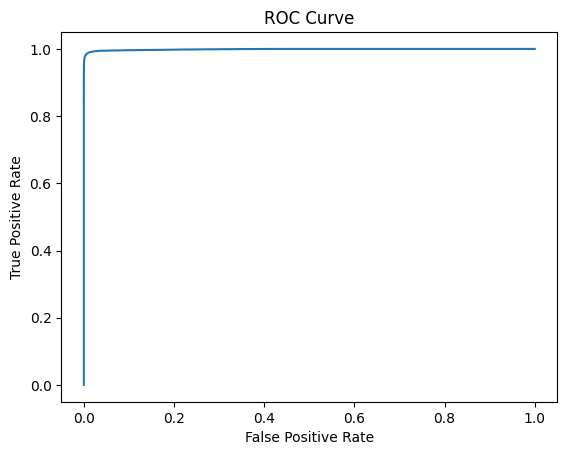

In [ ]:
# ROC CURVE
fpr, tpr, _ = roc_curve(y_test,RF_probability)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

[[ 89894  10242]
 [   378 100126]]


Text(50.722222222222214, 0.5, 'Truth')

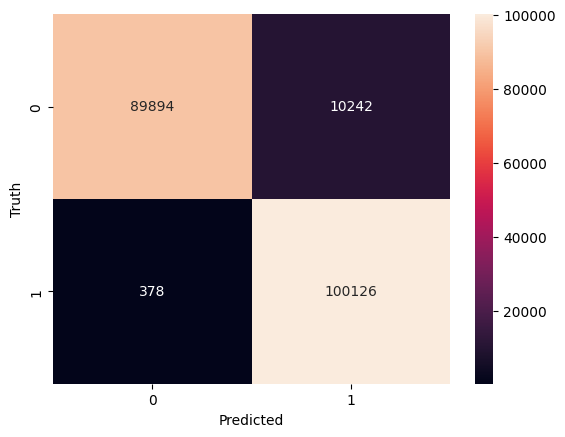

In [ ]:
# confusion matrix

cm = confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### ML Model - 3

In [ ]:
xgb = XGBClassifier()
xgbfit = xgb.fit(X_train,y_train)
y_pred = xgbfit.predict(X_test)
xgb_probability = xgbfit.predict_proba(X_test)[:, 1]

acc_xgb = accuracy_score(y_test,y_pred)
f1_xgb = f1_score(y_test,y_pred)
recall_xgb = recall_score(y_test,y_pred)
precision_xgb = precision_score(y_test,y_pred)
auc_xgb = roc_auc_score(y_pred,y_test)


print(f"Accuracy Score: {acc_xgb}")
print(f"F1 Score: {f1_xgb}")
print(f"Recall Score: {recall_xgb}")
print(f"Precision Score: {precision_xgb}")
print(f"AUC Score: {auc_xgb}")

Accuracy Score: 0.8157795055821372
F1 Score: 0.8363644412962634
Recall Score: 0.9398531401735254
Precision Score: 0.7534057554874937
AUC Score: 0.8365442361621143


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.69      0.92      0.79     75264
           1       0.94      0.75      0.84    125376

    accuracy                           0.82    200640
   macro avg       0.82      0.84      0.81    200640
weighted avg       0.85      0.82      0.82    200640



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

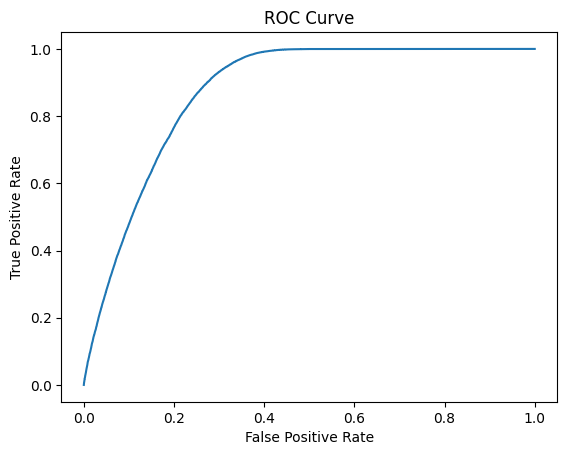

In [ ]:
fpr, tpr, _ = roc_curve(y_test,xgb_probability)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

[[69219 30917]
 [ 6045 94459]]


Text(50.722222222222214, 0.5, 'Truth')

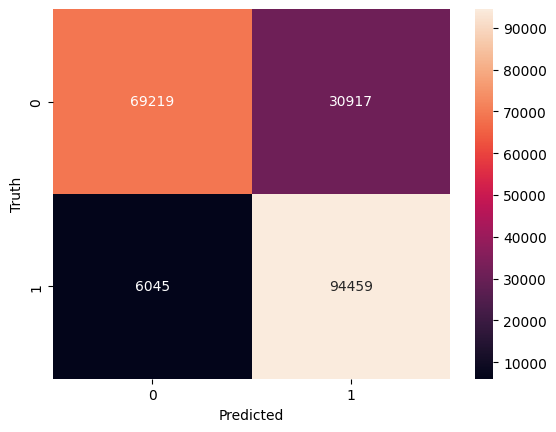

In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# Model Comparision

comp = ['Logistic Regression','Random Forest Classifier','XGBoost Classifier']
table = {"Accuracy":[acc_lr,acc_rf,acc_xgb],"Recall":[recall_lr,recall_rf,recall_xgb],"Precision":[precision_lr,precision_rf,precision_xgb],"F1 Score":[f1_lr,f1_rf,f1_xgb],"AUC":[AUC_lr,AUC_rf,auc_xgb]}
result = pd.DataFrame(data = table,index=comp)
result

,Accuracy,Recall,Precision,F1 Score,AUC
Logistic Regression,0.786354,0.976299,0.707920,0.820727,0.834761
Random Forest Classifier,0.947069,0.996239,0.907201,0.949638,0.951507
XGBoost Classifier,0.815780,0.939853,0.753406,0.836364,0.836544


from matplotlib import pyplot as plt
result['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result['Recall'].plot(kind='hist', bins=20, title='Recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result['F1 Score'].plot(kind='hist', bins=20, title='F1 Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result.plot(kind='scatter', x='Accuracy', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result.plot(kind='scatter', x='Recall', y='Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result.plot(kind='scatter', x='Precision', y='F1 Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result.plot(kind='scatter', x='F1 Score', y='AUC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
result['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
result['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
result['F1 Score'].plot(kind='line', figsize=(8, 4), title='F1 Score')
plt.gca().spines[['top', 'right']].set_visible(False)

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

To evaluate the positive business impact, I considered these key metrics:

**Recall:** It is crucial when missing positive instances can lead to significant losses. Since the problem seems to involve insurance, missing customers who are likely to buy vehicle insurance could reduce sales. High recall ensures that most potential customers are captured.

**Precision:** Precision is important to avoid unnecessary marketing efforts toward customers who are unlikely to convert. High precision ensures that marketing resources are focused on customers with a higher likelihood of purchasing.

**F1 Score:** The F1 score balances recall and precision, which is valuable when both false positives and false negatives are important. Since insurance marketing involves both converting the right customers (precision) and reaching as many potential customers as possible (recall), the F1 score is an ideal metric to assess overall effectiveness.

**AUC (Area Under the Curve)**: AUC provides a broad measure of a model's ability to distinguish between positive and negative classes. A higher AUC indicates better model performance across different thresholds, which is beneficial in a business scenario where decision thresholds might be adjusted to balance marketing efforts and costs.


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The Random Forest Classifier was chosen as the final prediction model because:

It has the highest F1 score (0.949638), indicating a balanced trade-off between precision (0.907201) and recall (0.996239).

Its AUC (0.951507) is the highest, showing that it has a strong ability to discriminate between customers interested in vehicle insurance and those who are not.

The high accuracy (0.947069) and precision ensure that fewer marketing efforts are wasted on customers who are unlikely to purchase, making it a more cost-effective model for business impact.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Random Forest Classifier is an ensemble learning method that builds multiple decision trees during training. Each tree is trained on a subset of the data, and predictions are made by averaging the results of all trees. This reduces the risk of overfitting while improving generalization.

To explain the model and feature importance, I would use SHAP (SHapley Additive exPlanations). SHAP values help in understanding how each feature contributes to the prediction.

Example of SHAP Insights:

Features such as Income or Age might be important if older, wealthier customers are more likely to buy insurance.

Vehicle-related features could show high importance since customers with certain types of vehicles may have a higher propensity to buy insurance.

SHAP allows for visualizing how the model's predictions change with different values of each feature, providing transparency and helping to identify which customer segments are most likely to convert.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Based on the performance metrics across the different models, the Random Forest Classifier was selected as the final model for predicting customer interest in vehicle insurance. This model exhibited the best balance between precision, recall, F1 score, and AUC, making it the most reliable for business impact:

High Recall (0.996239) ensures that almost all potential customers who would purchase vehicle insurance are captured, minimizing the loss of potential revenue opportunities.

High Precision (0.907201) indicates that most of the predicted positive customers are likely to be truly interested in vehicle insurance, optimizing marketing resources by reducing the cost of targeting unlikely buyers.

The F1 score of 0.949638 shows a strong balance between recall and precision, which is crucial when both customer acquisition and marketing efficiency are important.

The model's AUC (0.951507) demonstrates its robustness in distinguishing between customers who would and would not purchase vehicle insurance, making it adaptable to different marketing thresholds and strategies.

With the Random Forest Classifier, we can confidently move forward with a data-driven approach to target potential customers, thereby improving overall business efficiency and maximizing returns on marketing investments.

Insights Gained After Model Building:
High Customer Identification Accuracy:

The Random Forest Classifier achieved a high accuracy (94.7%), meaning the model can accurately identify a large proportion of customers who are likely to purchase vehicle insurance.
Maximizing Customer Reach (High Recall):

With a recall of 99.6%, the model ensures that nearly all potential customers who are likely to be interested in vehicle insurance are captured. This reduces the risk of missing out on potential sales opportunities.
Efficient Targeting (High Precision):

A precision of 90.7% indicates that most of the customers the model predicts as likely to buy vehicle insurance are indeed interested. This minimizes wasted marketing efforts on customers who are unlikely to convert, making marketing campaigns more cost-effective.
Balanced Marketing Strategy (F1 Score):

The F1 score of 94.9% shows that the model strikes a good balance between identifying many potential customers (recall) and ensuring that those identified are genuinely likely to convert (precision). This balance is crucial for optimizing both customer acquisition and marketing efficiency.
Feature Importance:

By using tools like SHAP, the model's feature importance analysis revealed key factors driving customer interest in vehicle insurance. For example, demographic features like age and income may play a significant role, along with vehicle-related characteristics.
This insight helps tailor marketing efforts to the right customer segments, improving conversion rates.
Strategic Decision-Making (AUC Score):

With an AUC of 95.1%, the model shows strong capability in distinguishing between customers likely to buy vehicle insurance and those who are not, regardless of the chosen decision threshold. This allows flexibility in adjusting the threshold based on marketing goals, such as reaching a broader audience or focusing on more likely buyers.